In [1]:
# 전이학습
# 사전 학습된 네트워크의 가중치를 사용하는 것

# 모델을 변형하지 않고 사용
# 모델의 분류기 만을 재학습, 가장 많이 쓰이는 방법.
# 모델의 일부를 동결 해제하여 재학습하는 방법



170498071/170498071 [==============================] - 14s 0us/step


(35000, 1)

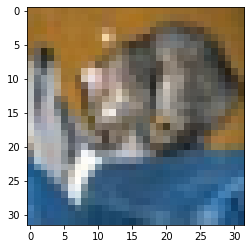

In [2]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.imshow(x_test[0])

x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test =(x_test-x_mean)/x_std

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

y_train.shape

In [3]:
x_train.shape

(35000, 32, 32, 3)

In [4]:
# 불러와서 사용할 때, 분류기만 새로 학습하는 경우가 많다.
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                   )

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train,y_train, batch_size= batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam

from keras.applications import VGG16
# 다양한 모델이 있다. 탭으로 확인 가능능
# 어떤 데이터가 어떤 구조의 모델에서 최고성능을 낼지 모른다.
# VGG16 모델은 이미 학습된 모델이다.

vgg16 = VGG16(include_top = False , input_shape=(32, 32, 3))
# 모델은 학습했던 데이터 규격이 있다.
# 규격 이외에의 데이터를 쓰기 위한 파라미터 설정정

vgg16.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [6]:
# 일부 동결 후 학습

for layer in vgg16.layers[:-4]:
  # 분류기 제외 동결결
  layer.trainable = False

In [7]:
vgg16.summary()

# Non-trainable params 값이 바뀐다.
# Non-trainable params은 학습 진행 시에도 학습이 되지 않는다.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [8]:
model = Sequential([
    vgg16,
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(10, activation = 'softmax')

])

model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

def get_step(train_len, batch_size):
  if(train_len % batch_size >0 ):
    return train_len // batch_size + 1
    
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs=30,
                    steps_per_epoch= get_step(len(x_train), batch_size),
                    validation_data=val_generator,
                    validation_steps = get_step(len(x_val), batch_size)
                    )


Epoch 1/30
1094/1094 [==============================] - 40s 28ms/step - loss: 1.1246 - acc: 0.1018 - val_loss: 0.8439 - val_acc: 0.1051
Epoch 2/30
1094/1094 [==============================] - 31s 28ms/step - loss: 0.9248 - acc: 0.1021 - val_loss: 0.8489 - val_acc: 0.1171
Epoch 3/30
1094/1094 [==============================] - 31s 28ms/step - loss: 0.8459 - acc: 0.1032 - val_loss: 0.7679 - val_acc: 0.0823
Epoch 4/30
1094/1094 [==============================] - 31s 28ms/step - loss: 0.8042 - acc: 0.1031 - val_loss: 0.7509 - val_acc: 0.0733
Epoch 5/30
1094/1094 [==============================] - 31s 28ms/step - loss: 0.7707 - acc: 0.1035 - val_loss: 0.6931 - val_acc: 0.1057
Epoch 6/30
1094/1094 [==============================] - 31s 29ms/step - loss: 0.7374 - acc: 0.1019 - val_loss: 0.7234 - val_acc: 0.0699
Epoch 7/30
1094/1094 [==============================] - 31s 28ms/step - loss: 0.7027 - acc: 0.1034 - val_loss: 0.6806 - val_acc: 0.0858
Epoch 8/30
1094/1094 [==========================

In [9]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test, batch_size = batch_size)
pred = model.predict(x_test)
np.argmax(np.round(pred[0],2))

313/313 [==============================] - 3s 9ms/step


3